In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# **Loading dataset**

In [2]:
batch_size = 32
img_height = 224
img_width = 224

# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     'gdrive/MyDrive/Peltarion v1/dataset/train/Image', 
    'dataset/train/Image',
    label_mode='categorical', color_mode='rgb', 
    batch_size=32, image_size=(224, 224), seed=42
)


val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     'gdrive/MyDrive/Peltarion v1/dataset/validation/Image', 
    'dataset/validation/Image',
    label_mode='categorical', color_mode='rgb', 
    batch_size=32, image_size=(224, 224), seed=42
)

Found 1209 files belonging to 8 classes.
Found 303 files belonging to 8 classes.


## Show the data

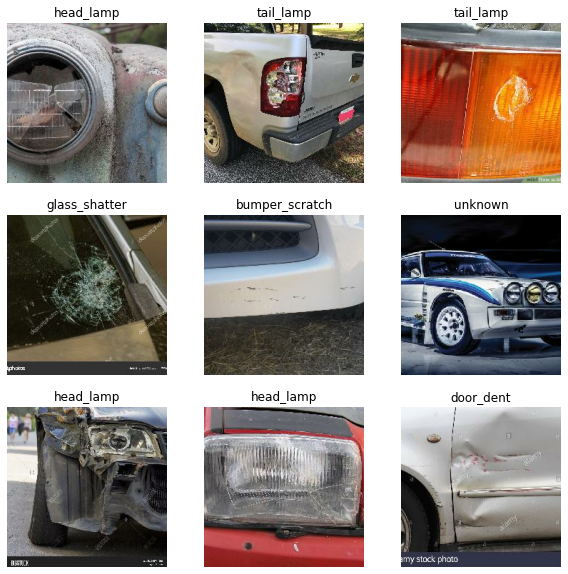

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  titles_str = ['bumper_dent','bumper_scratch','door_dent','door_scratch',
              'glass_shatter','head_lamp','tail_lamp','unknown']
  titles = tf.argmax(labels, axis=1).numpy().tolist()

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(titles_str[titles[i]])
    plt.axis("off")

## Configure the dataset for performance

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

## **Model**

## Data augmentation layers

In [6]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

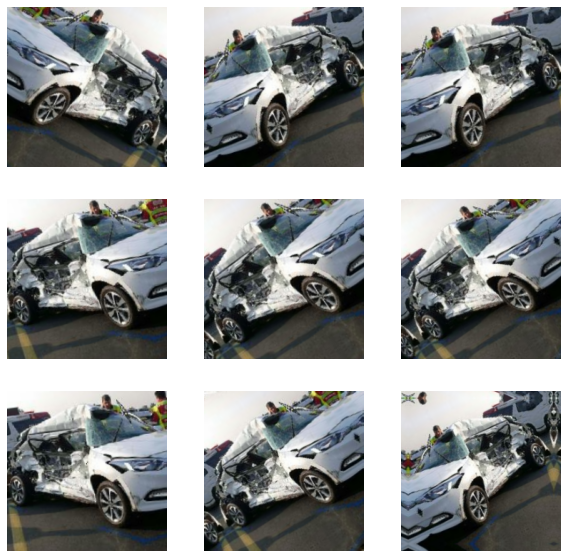

In [7]:
# show what data augmentation might look like
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Model architecture

In [12]:
num_classes = len(titles_str)

# simple original
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.9),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.6),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)       

## Train

In [ ]:
epochs = 400
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/400
38/38 [==============================] - 3s 66ms/step - loss: 2.0049 - accuracy: 0.3383 - val_loss: 1.8386 - val_accuracy: 0.3630
Epoch 2/400
38/38 [==============================] - 2s 59ms/step - loss: 1.8784 - accuracy: 0.3557 - val_loss: 1.9078 - val_accuracy: 0.3630
Epoch 3/400
38/38 [==============================] - 2s 59ms/step - loss: 1.7738 - accuracy: 0.3730 - val_loss: 1.9656 - val_accuracy: 0.3630
Epoch 4/400
38/38 [==============================] - 2s 59ms/step - loss: 1.7423 - accuracy: 0.3780 - val_loss: 1.7562 - val_accuracy: 0.3795
Epoch 5/400
38/38 [==============================] - 2s 59ms/step - loss: 1.7423 - accuracy: 0.3871 - val_loss: 1.8954 - val_accuracy: 0.3795
Epoch 6/400
38/38 [==============================] - 2s 59ms/step - loss: 1.6981 - accuracy: 0.4036 - val_loss: 1.9148 - val_accuracy: 0.3828
Epoch 7/400
38/38 [==============================] - 2s 59ms/step - loss: 1.7214 - accuracy: 0.4119 - val_loss: 1.6699 - val_accuracy: 0.4290
Epoch 

38/38 [==============================] - 2s 59ms/step - loss: 1.0831 - accuracy: 0.6030 - val_loss: 1.0963 - val_accuracy: 0.6304
Epoch 116/400
38/38 [==============================] - 2s 59ms/step - loss: 1.0241 - accuracy: 0.6261 - val_loss: 1.2169 - val_accuracy: 0.6403
Epoch 117/400
38/38 [==============================] - 2s 60ms/step - loss: 1.0267 - accuracy: 0.6344 - val_loss: 1.3193 - val_accuracy: 0.5941
Epoch 118/400
38/38 [==============================] - 2s 60ms/step - loss: 1.0307 - accuracy: 0.6319 - val_loss: 1.4519 - val_accuracy: 0.6238
Epoch 119/400
38/38 [==============================] - 2s 60ms/step - loss: 1.0348 - accuracy: 0.6319 - val_loss: 1.4403 - val_accuracy: 0.5875
Epoch 120/400
38/38 [==============================] - 2s 60ms/step - loss: 1.0518 - accuracy: 0.6237 - val_loss: 1.1946 - val_accuracy: 0.6172
Epoch 121/400
38/38 [==============================] - 2s 60ms/step - loss: 1.0237 - accuracy: 0.6104 - val_loss: 1.4375 - val_accuracy: 0.6007
Epoch 

Epoch 172/400
38/38 [==============================] - 2s 59ms/step - loss: 0.8977 - accuracy: 0.6576 - val_loss: 1.2452 - val_accuracy: 0.6601
Epoch 173/400
38/38 [==============================] - 2s 60ms/step - loss: 0.9663 - accuracy: 0.6410 - val_loss: 1.1659 - val_accuracy: 0.6634
Epoch 174/400
38/38 [==============================] - 2s 60ms/step - loss: 0.8919 - accuracy: 0.6700 - val_loss: 1.3685 - val_accuracy: 0.6337
Epoch 175/400
38/38 [==============================] - 2s 59ms/step - loss: 0.9058 - accuracy: 0.6634 - val_loss: 1.1176 - val_accuracy: 0.6799
Epoch 176/400
38/38 [==============================] - 2s 59ms/step - loss: 0.8714 - accuracy: 0.6807 - val_loss: 1.2442 - val_accuracy: 0.6436
Epoch 177/400
38/38 [==============================] - 2s 61ms/step - loss: 0.9561 - accuracy: 0.6559 - val_loss: 1.2422 - val_accuracy: 0.6403
Epoch 178/400
38/38 [==============================] - 2s 60ms/step - loss: 0.9304 - accuracy: 0.6600 - val_loss: 1.1671 - val_accuracy:

Epoch 229/400
38/38 [==============================] - 2s 60ms/step - loss: 0.9118 - accuracy: 0.6667 - val_loss: 1.3828 - val_accuracy: 0.6766
Epoch 230/400
38/38 [==============================] - 2s 60ms/step - loss: 0.8568 - accuracy: 0.6882 - val_loss: 1.5208 - val_accuracy: 0.6205
Epoch 231/400
38/38 [==============================] - 2s 60ms/step - loss: 0.8249 - accuracy: 0.6998 - val_loss: 1.4339 - val_accuracy: 0.6271
Epoch 232/400
38/38 [==============================] - 2s 60ms/step - loss: 0.8583 - accuracy: 0.6766 - val_loss: 1.2005 - val_accuracy: 0.6403
Epoch 233/400
38/38 [==============================] - 2s 60ms/step - loss: 0.9060 - accuracy: 0.6485 - val_loss: 1.3172 - val_accuracy: 0.6436
Epoch 234/400
38/38 [==============================] - 2s 60ms/step - loss: 0.8453 - accuracy: 0.7039 - val_loss: 1.2496 - val_accuracy: 0.6535
Epoch 235/400
38/38 [==============================] - 2s 60ms/step - loss: 0.8263 - accuracy: 0.6873 - val_loss: 1.3859 - val_accuracy:

Epoch 286/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7347 - accuracy: 0.7097 - val_loss: 1.5408 - val_accuracy: 0.6337
Epoch 287/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7530 - accuracy: 0.7080 - val_loss: 1.4194 - val_accuracy: 0.6832
Epoch 288/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7806 - accuracy: 0.7221 - val_loss: 1.3431 - val_accuracy: 0.6634
Epoch 289/400
38/38 [==============================] - 2s 59ms/step - loss: 0.8108 - accuracy: 0.6940 - val_loss: 1.2904 - val_accuracy: 0.6634
Epoch 290/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7483 - accuracy: 0.7237 - val_loss: 1.9687 - val_accuracy: 0.6205
Epoch 291/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7646 - accuracy: 0.7188 - val_loss: 1.3968 - val_accuracy: 0.6469
Epoch 292/400
38/38 [==============================] - 2s 60ms/step - loss: 0.8249 - accuracy: 0.7146 - val_loss: 1.1738 - val_accuracy:

Epoch 343/400
38/38 [==============================] - 2s 61ms/step - loss: 0.7081 - accuracy: 0.7378 - val_loss: 1.4085 - val_accuracy: 0.6568
Epoch 344/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7558 - accuracy: 0.7287 - val_loss: 1.5080 - val_accuracy: 0.6601
Epoch 345/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7509 - accuracy: 0.7320 - val_loss: 1.7936 - val_accuracy: 0.6436
Epoch 346/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7534 - accuracy: 0.7353 - val_loss: 1.3959 - val_accuracy: 0.6634
Epoch 347/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7508 - accuracy: 0.7130 - val_loss: 1.7091 - val_accuracy: 0.6337
Epoch 348/400
38/38 [==============================] - 2s 61ms/step - loss: 0.7549 - accuracy: 0.7279 - val_loss: 1.5382 - val_accuracy: 0.6502
Epoch 349/400
38/38 [==============================] - 2s 60ms/step - loss: 0.7317 - accuracy: 0.7386 - val_loss: 1.3598 - val_accuracy:

## Accuracy and loss graph

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()